![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [233]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
5,-31.0,woman,25.740,0.0,no,southeast,$3756.6216
6,46.0,woman,33.440,1.0,no,southeast,8240.5896
7,37.0,female,27.740,3.0,no,Northwest,7281.5056
8,37.0,male,29.830,2.0,no,Northeast,$6406.4107
9,60.0,female,25.840,0.0,no,northwest,28923.13692


In [234]:
# First we need to check the types and the nulls in every column
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [235]:
# We have some nulls, we are going to erase every row that contains some nulls values
insurance_nonulls = insurance.dropna()
insurance_nonulls

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


In [236]:
# I noticed that region column has some categories in uppercase and others in lowercase
insurance_nonulls["region"].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [237]:
#I fixed the problem in region column
insurance_nonulls["region"] = insurance_nonulls["region"].str.lower()
insurance_nonulls["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [238]:
# I noticed that region column has some categories in uppercase and others in lowercase
insurance_nonulls["sex"].unique()


array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [239]:
#I fixed the problem in sex column
insurance_nonulls["sex"] = insurance_nonulls["sex"].str.lower()
FEMALE = "female"
MALE = "male"
sex_correction = {"woman":FEMALE,"f":FEMALE,"man":MALE,"m":MALE}
insurance_nonulls["sex"] = insurance_nonulls["sex"].replace(sex_correction)
insurance_nonulls["sex"].unique()

array(['female', 'male'], dtype=object)

In [240]:
insurance_nonulls.info()
insurance_nonulls["smoker"] = (insurance_nonulls["smoker"] == "yes")
#I transformed smoker column into boolean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 107.8+ KB


In [241]:
#Some of the values in column charges has $
insurance_nonulls["charges"].sample(15)

1231    20167.33603
156      21223.6758
476     35147.52848
306     20177.67113
1154     11015.1747
302      12265.5069
122     $2257.47525
1042    33475.81715
408      $6652.5288
898       1634.5734
75       11356.6609
694       $3577.999
108       2867.1196
775      10560.4917
238      17352.6803
Name: charges, dtype: object

In [242]:
#I eliminate $ from charges column
insurance_nonulls["charges"]= insurance_nonulls["charges"].str.strip("$").astype("float64")
insurance_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 99.5+ KB


In [243]:
#some ages are negative, i turned all ages into positive values

import numpy as np

insurance_positive = insurance_nonulls.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
insurance_positive

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.92400
1,18.0,male,33.770,1.0,False,southeast,1725.55230
2,28.0,male,33.000,3.0,False,southeast,4449.46200
3,33.0,male,22.705,0.0,False,northwest,21984.47061
4,32.0,male,28.880,0.0,False,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,False,northwest,10600.54830
1334,18.0,female,31.920,0.0,False,northeast,2205.98080
1335,18.0,female,36.850,0.0,False,southeast,1629.83350
1336,21.0,female,25.800,0.0,False,southwest,2007.94500


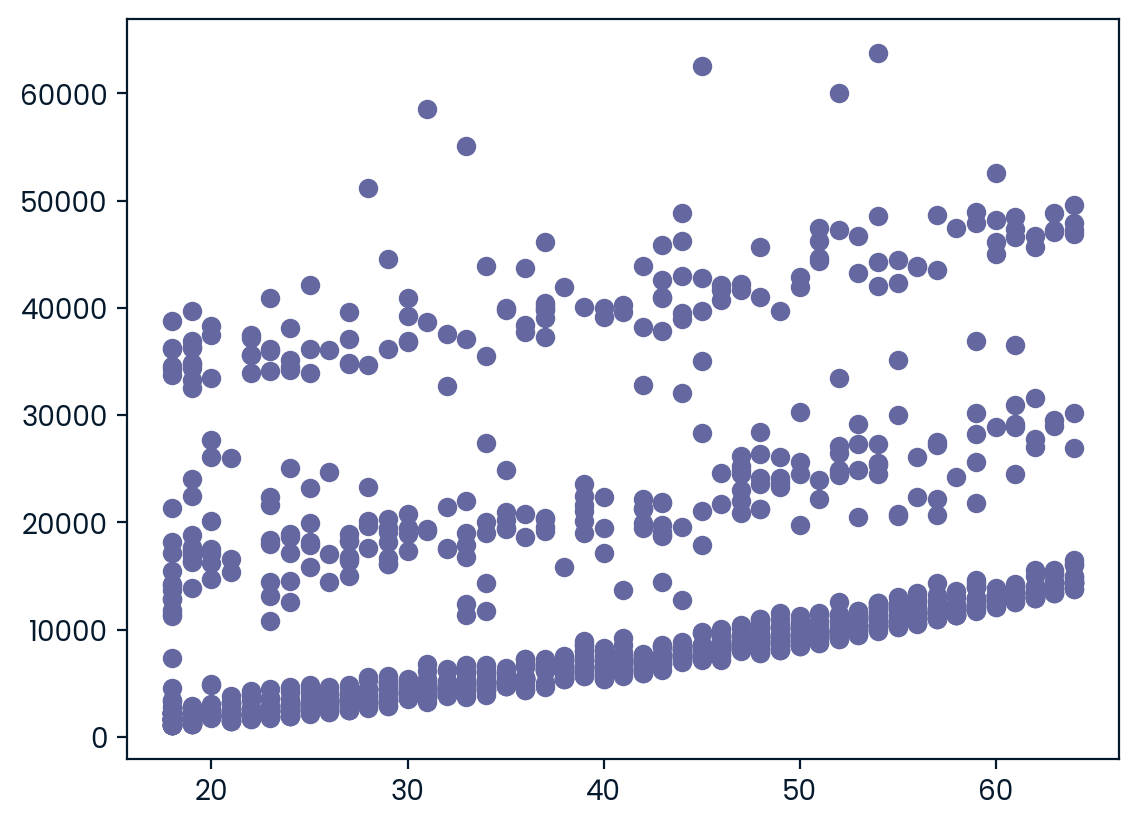

In [244]:
import matplotlib.pyplot as plt 
df = insurance_positive.copy()
plt.scatter(df["age"],df["charges"])

In [245]:
df_fin = pd.get_dummies(df,prefix=["region"],columns=["region"])
df_fin = df_fin.drop(columns = ["region_southwest"])
df_fin

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,19.0,female,27.900,0.0,True,16884.92400,0,0,0
1,18.0,male,33.770,1.0,False,1725.55230,0,0,1
2,28.0,male,33.000,3.0,False,4449.46200,0,0,1
3,33.0,male,22.705,0.0,False,21984.47061,0,1,0
4,32.0,male,28.880,0.0,False,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,False,10600.54830,0,1,0
1334,18.0,female,31.920,0.0,False,2205.98080,1,0,0
1335,18.0,female,36.850,0.0,False,1629.83350,0,0,1
1336,21.0,female,25.800,0.0,False,2007.94500,0,0,0


In [246]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1208 non-null   float64
 1   sex               1208 non-null   object 
 2   bmi               1208 non-null   float64
 3   children          1208 non-null   float64
 4   smoker            1208 non-null   bool   
 5   charges           1207 non-null   float64
 6   region_northeast  1208 non-null   uint8  
 7   region_northwest  1208 non-null   uint8  
 8   region_southeast  1208 non-null   uint8  
dtypes: bool(1), float64(4), object(1), uint8(3)
memory usage: 93.6+ KB


In [247]:
df_fin["smoker"] = df_fin["smoker"].astype("int64")
df_fin["is_male"] = (df_fin["sex"]=="male").astype("int64")
df_fin = df_fin.drop(columns = "sex")

df_fin

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,0,0
1,18.0,33.770,1.0,0,1725.55230,0,0,1,1
2,28.0,33.000,3.0,0,4449.46200,0,0,1,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0,10600.54830,0,1,0,1
1334,18.0,31.920,0.0,0,2205.98080,1,0,0,0
1335,18.0,36.850,0.0,0,1629.83350,0,0,1,0
1336,21.0,25.800,0.0,0,2007.94500,0,0,0,0


In [248]:
df_fin = df_fin.dropna()
df_fin

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,0,0
1,18.0,33.770,1.0,0,1725.55230,0,0,1,1
2,28.0,33.000,3.0,0,4449.46200,0,0,1,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0,10600.54830,0,1,0,1
1334,18.0,31.920,0.0,0,2205.98080,1,0,0,0
1335,18.0,36.850,0.0,0,1629.83350,0,0,1,0
1336,21.0,25.800,0.0,0,2007.94500,0,0,0,0


In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Separar las características (X) y la variable objetivo (y)
X = df_fin.drop(columns=["charges"])
y = df_fin["charges"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular el R2 score
r2_score = r2_score(y_test, y_pred)

# Mostrar el R2 score
r2_score

0.7049323160872815

In [250]:
import pandas as pd

df_val = pd.read_csv("validation_dataset.csv")
df_val["age"].min

#there is no negative ages in validation dataset

<bound method NDFrame._add_numeric_operations.<locals>.min of 0     18.0
1     39.0
2     27.0
3     71.0
4     28.0
5     70.0
6     29.0
7     42.0
8     48.0
9     63.0
10    27.0
11    51.0
12    60.0
13    57.0
14    20.0
15    18.0
16    83.0
17    92.0
18    84.0
19    55.0
20    23.0
21    49.0
22    33.0
23    47.0
24    40.0
25    21.0
26    74.0
27    28.0
28    57.0
29    45.0
30    27.0
31    19.0
32    44.0
33    63.0
34    43.0
35    46.0
36    78.0
37    52.0
38    18.0
39    70.0
40    29.0
41    35.0
42    29.0
43    89.0
44    26.0
45    58.0
46    92.0
47    19.0
48    61.0
49    44.0
Name: age, dtype: float64>

In [251]:
#region is written correctly

df_val["region"].unique()

array(['southeast', 'northeast', 'northwest', 'southwest'], dtype=object)

In [252]:
#sex is written correctly

df_val["sex"].unique()

array(['female', 'male'], dtype=object)

In [253]:
#so we can do the same transformations that we did in the first dataframe without problem

def df_transformation(df):
    df_fin = pd.get_dummies(df,prefix=["region"],columns=["region"])
    df_fin = df_fin.drop(columns = ["region_southwest"])
    df_fin["smoker"] = (df_fin["smoker"] == "yes")
    df_fin["smoker"] = df_fin["smoker"].astype("int64")
    df_fin["is_male"] = (df_fin["sex"]=="male").astype("int64")
    df_fin = df_fin.drop(columns = "sex")

    return df_fin


In [254]:
validation_data = pd.read_csv("validation_dataset.csv")
input_df = df_transformation(validation_data)
predictions = model.predict(input_df)

predictions

array([ 3.52537878e+02,  3.09562147e+04,  2.77994096e+04,  5.71944148e+04,
        6.68542631e+03,  5.86778384e+04,  7.04440596e+03,  1.30656580e+04,
        1.26657036e+04,  1.61425411e+04,  2.52853835e+03,  1.44317748e+04,
        1.13808735e+04,  1.20997623e+04,  2.69587308e+03,  3.72888611e+03,
        4.25657672e+04,  6.43384787e+04,  5.93902149e+04,  1.15252685e+04,
       -5.82951707e+01,  1.28982287e+04,  3.24813915e+04,  1.21666342e+04,
        9.75512982e+03,  5.09785330e+03,  5.90920861e+04,  3.34504228e+03,
        1.18776338e+04,  1.05767394e+04,  6.18916893e+03,  2.72111048e+04,
        3.11411087e+04,  1.34473395e+04,  3.26866927e+04,  1.39288587e+04,
        5.91570393e+04,  1.44799199e+04, -2.37352284e+02,  2.97924065e+04,
        3.02110368e+04,  1.17286358e+04,  3.73534807e+03,  6.05651275e+04,
        5.62647547e+03,  4.02915840e+04,  6.83106824e+04,  3.06084743e+04,
        1.50741321e+04,  3.55325780e+04])

In [255]:
# Add predicted charges to the validation data
validation_data['predicted_charges'] = predictions


In [256]:
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083


In [257]:
# Adjust predictions to ensure minimum charge is $1000
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

In [258]:
# Display the updated dataframe
validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
